In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd

In [2]:
x, y = make_blobs(n_samples=1000, centers=3, n_features=2)

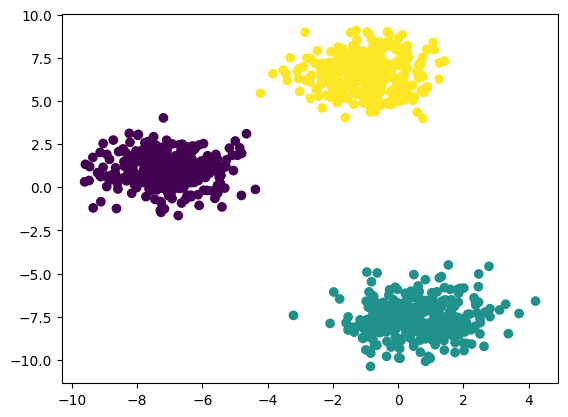

In [3]:
plt.scatter(x[:, 0], x[:, 1], c=y)

In [4]:
# standardization : feature scaling technique!

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scalar = StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) 

In [9]:
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
# Elbow method to select the k value

In [12]:
wcss = []

for k in range(1, 11):
    model = KMeans(n_clusters=k, init="k-means++")
    model.fit(x_train_scaled)

    wcss.append(model.inertia_)

In [13]:
wcss

[1340.0,
 872.3317759007609,
 77.61040017798524,
 62.71823403420369,
 51.19102776839418,
 47.493458274145624,
 37.924883265195355,
 33.06955336617947,
 29.58904381454883,
 27.311284856904066]

In [14]:
# plot elbow curve!

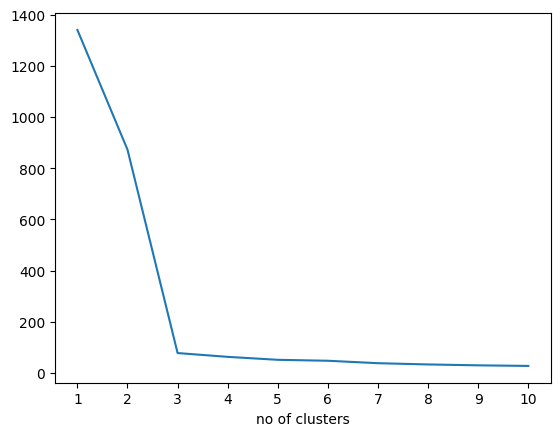

In [15]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('no of clusters')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [17]:
kmeans.fit_predict(x_train_scaled)

array([1, 1, 2, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0,
       1, 1, 0, 2, 0, 2, 2, 0, 1, 1, 1, 0, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 0, 1,
       0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0,
       0, 0, 2, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0,
       0, 1, 2, 2, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 1, 1,
       1, 2, 2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 0, 1, 1, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 2,
       0, 1, 2, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 1,
       0, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0,
       0, 2, 0, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 0,
       0, 2, 0, 0, 2, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1,

In [18]:
y_pred = kmeans.predict(x_test_scaled)

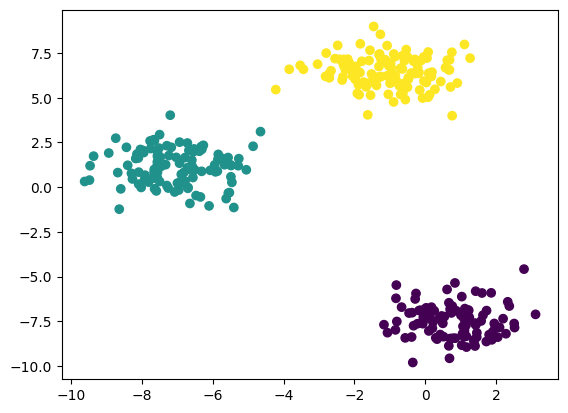

In [19]:
plt.scatter(x_test[:, 0], x_test[:,1], c=y_pred)

In [20]:
# Validate k value!

# 1) kneelocator
# 2) silhoutee scoring

In [21]:
# !pip install kneed

In [22]:
from kneed import KneeLocator

In [23]:
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

In [24]:
kl.elbow

np.int64(3)

In [25]:
# Silhoutee scoring



In [26]:
# find the highest value!
from sklearn.metrics import silhouette_score    

In [27]:
silhouette = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x_train_scaled)

    score = silhouette_score(x_train_scaled, kmeans.labels_)
    silhouette.append(score)

In [28]:
silhouette

[np.float64(0.6307963228136938),
 np.float64(0.8015361795746909),
 np.float64(0.6549614632765766),
 np.float64(0.5138409288949192),
 np.float64(0.4942916460676602),
 np.float64(0.47547783988346526),
 np.float64(0.3600837114148687),
 np.float64(0.36647327801152585),
 np.float64(0.3357025710577005)]

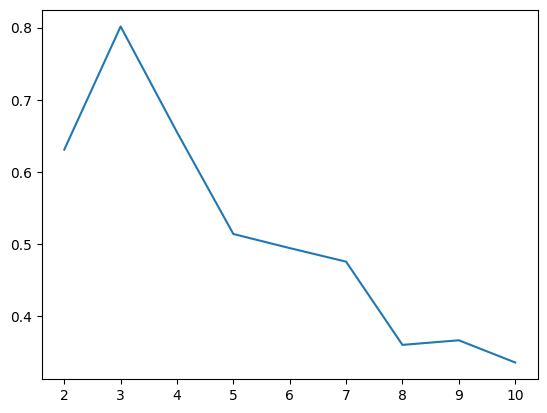

In [29]:
plt.plot(range(2, 11), silhouette)
plt.show()

In [30]:
y

array([1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1,
       1, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 2, 2, 0, 1, 2,
       0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1,
       2, 0, 0, 0, 2, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2,
       2, 0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 0, 2, 2,
       2, 1, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 2, 2,
       0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 1,
       0, 2, 1, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2, 2, 0,
       0, 0, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 2, 1,